In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Web Science Coursework/data/datajson

/content/drive/MyDrive/Colab Notebooks/Web Science Coursework/data/datajson


In [ ]:
!pip install nltk

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
files=["geoLondonSep2022_1.json", "geoLondonSep2022_2.json", "geoLondonSep2022_3.json", "geoLondonSep2022_4.json", "geoLondonSep2022_5.json"]

def merge_JsonFiles(filename):
    result = list()
    for f1 in filename:
        with open(f1, 'r') as infile:
            result.extend(json.load(infile))

    with open('combined.json', 'w') as output_file:
        json.dump(result, output_file)

merge_JsonFiles(files)
# Read JSON data combined combined tweet information
# with open(r'combined.json', 'r') as file:
#     tweet_data = json.load(file)

tweet_data = pd.read_json('combined.json') #, lines=True)

In [ ]:
tweet_data

,_id,date,screen_name,qualityScore,text,url,description,listed_count,user_created,geo_enabled,...,location,followers_count,friends_count,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source
0,1565429028747616256,{'$date': '2022-09-01T19:58:59Z'},loststoryart,0.554386,"Just posted a photo @ London, United Kingdom h...",https://t.co/Ejo6POjL2A,Artist/Dreamer,0,{'$date': '2014-09-06T16:58:45Z'},True,...,"London, England",105,105,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
1,1565428982660603907,{'$date': '2022-09-01T19:58:48Z'},amovivirlavida_,0.590283,"Just posted a photo @ London, United Kingdom h...",https://t.co/0EJaicfKj4,Graphic Designer & Influencer | 👻 - @ amovivir...,9,{'$date': '2012-02-06T20:32:30Z'},True,...,"Exeter, England",108,108,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
2,1565428290017443846,{'$date': '2022-09-01T19:56:03Z'},NR_Boutique,0.591719,Just posted a photo @ Eliza Jane Howell https:...,https://t.co/SqygvueJN5,Mother of the Bride & Groom Outfits and Matchi...,57,{'$date': '2012-04-20T19:10:02Z'},True,...,London & Manchester,2305,2305,"Paddington, London",United Kingdom,GB,"[[[-0.2160701, 51.5098789], [-0.1301597, 51.50...",[],[],Instagram
3,1565427593851158528,{'$date': '2022-09-01T19:53:17Z'},grahamsrenwick,0.592131,"Just posted a photo @ London, Unιted Kingdom h...",https://t.co/FIROKbxbXF,"Designer, Dreamer, Creator, Artist @7490REN. L...",5,{'$date': '2012-08-24T21:23:58Z'},True,...,London,228,228,"Camberwell, London",United Kingdom,GB,"[[[-0.11147549999999999, 51.4194247], [-0.0297...",[],[],Instagram
4,1565425981246115842,{'$date': '2022-09-01T19:46:52Z'},Nickyfar,0.664139,A fun day murdering in London Town for the fir...,https://t.co/bPhORACxRM,Actress.Singer.Muse.Mischief.Bad Girl forever....,48,{'$date': '2009-02-06T13:18:51Z'},True,...,Dorset.Sometimes London.,4141,4141,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[OrganiseEvents],[themarcusmassey],Instagram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13187,1575580078368378881,{'$date': '2022-09-29T20:15:38Z'},tracymayh,0.588676,"Just posted a photo @ The Langham, London http...",https://t.co/bdcKcb6Qpq,Tracy May Beauty. Guest Speaker. Educator. Ski...,2,{'$date': '2009-10-26T12:16:17Z'},True,...,Staffordshire,217,217,"Paddington, London",United Kingdom,GB,"[[[-0.2160701, 51.5098789], [-0.1301597, 51.50...",[],[],Instagram
13188,1575579146775777280,{'$date': '2022-09-29T20:11:56Z'},z_mie,0.569792,"I'm at Viet Food in London, Greater London htt...",None,🈚️ 変わらずないよずって｜山崎賢人大好き😘,21,{'$date': '2010-09-02T16:55:48Z'},True,...,SH —》SG,594,594,"London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],[],Foursquare
13189,1575578499121041408,{'$date': '2022-09-29T20:09:21Z'},Djyeo,0.592224,"Just posted a photo @ London, United Kingdom h...",https://t.co/qWab8W8sbm,Actor|Commercial Model| Presenter. Coffee Conn...,224,{'$date': '2009-01-31T20:52:54Z'},True,...,LONDON/NYC,4716,4716,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
13190,1575577168826232832,{'$date': '2022-09-29T20:04:04Z'},CellarDoorChris,0.607921,Drinking a Studio Lager by @SignatureBrew at @...,https://t.co/WsmHN08X3O,"Music, craft beer, wrestling & video game love...",27,{'$date': '2009-03-16T22:06:02Z'},True,...,"London, UK",469,469,"Islington, London",United Kingdom,GB,"[[[-0.1420579, 51.5185518], [-0.076305, 51.518...",[],"[SignatureBrew, thelexington]",Untappd


In [ ]:
def calculate_haversine_distance(location_a, location_b):
  """
  This function calculates the Haversine distance between two geographic locations.
  """
  longitude_a, latitude_a, longitude_b, latitude_b = map(np.radians, [location_a[0], location_a[1], location_b[0], location_b[1]])
  hav = np.sin((latitude_b - latitude_a) / 2) ** 2 + np.cos(latitude_a) * np.cos(latitude_b) * np.sin((longitude_b - longitude_a) / 2) ** 2
  return 6371 * 2 * np.arcsin(np.sqrt(hav))

# Define the reference location (longitude, latitude)
reference_x, reference_y = -0.563, 51.261318  # You can change these values

comparison_x, comparison_y = [0.28036, 51.686031]

# Calculate the number of rows and columns in the grid
num_rows = np.ceil(calculate_haversine_distance([reference_x, reference_y], [reference_x, comparison_y])).astype(int)
num_cols = np.ceil(calculate_haversine_distance([reference_x, reference_y], [comparison_x, reference_y])).astype(int)
total_grids = num_rows * num_cols

# Print the grid dimensions
print('The number of rows:', num_rows)
print('The number of columns:', num_cols)
print('The number of grids:', total_grids)

# Initialize a grid map to store tweet counts
grid_map = np.zeros((num_rows, num_cols), dtype=int)

# Loop through each tweet's coordinates and update the grid map
for tweet_location in tweet_data['coordinates']:
  row_index = np.ceil(calculate_haversine_distance([reference_x, reference_y], [reference_x, tweet_location[1]])).astype(int)
  col_index = np.ceil(calculate_haversine_distance([reference_x, reference_y], [tweet_location[0], reference_y])).astype(int)
  grid_map[row_index, col_index] += 1

# Convert the grid map to a list for further analysis
tweet_counts = np.ravel(grid_map)

# Define column names for the DataFrame
grid_id_col = 'Grid ID'
tweet_count_col = 'Tweet Count'

# Create a Pandas DataFrame to store the grid information
tweet_data_frame = pd.DataFrame({grid_id_col: np.arange(1, total_grids + 1), tweet_count_col: tweet_counts})


The number of rows: 48
The number of columns: 59
The number of grids: 2832


### **Question (i)**

In [ ]:
def calculate_haversine_distance(reference_location, target_location):
  """
  This function calculates the Haversine distance between two geographic locations.
  """
  reference_x, reference_y, target_x, target_y = map(np.radians, [reference_location[0], reference_location[1], target_location[0], target_location[1]])
  hav = np.sin((target_y - reference_y) / 2) ** 2 + np.cos(reference_y) * np.cos(target_y) * np.sin((target_x - reference_x) / 2) ** 2
  return 6371 * 2 * np.arcsin(np.sqrt(hav))


In [ ]:
reference_x, reference_y = -0.563, 51.261318  # You can change these values
comparison_x, comparison_y = [0.28036, 51.686031]

def calculate_haversine_distance(reference_location, target_location):
  """
  This function calculates the Haversine distance between two geographic locations.
  """
  reference_longitude, reference_latitude, target_longitude, target_latitude = map(np.radians, [reference_location[0], reference_location[1], target_location[0], target_location[1]])
  hav = np.sin((target_latitude - reference_latitude) / 2) ** 2 + np.cos(reference_latitude) * np.cos(target_latitude) * np.sin((target_longitude - reference_longitude) / 2) ** 2
  return 6371 * 2 * np.arcsin(np.sqrt(hav))

# Calculate the number of rows and columns in the grid
num_rows = np.ceil(calculate_haversine_distance([reference_x, reference_y], [reference_x, comparison_y])).astype(int)
num_cols = np.ceil(calculate_haversine_distance([reference_x, reference_y], [comparison_x, reference_y])).astype(int)
total_grids = num_rows * num_cols

# Print the grid dimensions
print('The number of rows:', num_rows)
print('The number of columns:', num_cols)
print('The number of grids:', total_grids)


The number of rows: 48
The number of columns: 59
The number of grids: 2832


In [ ]:
# Initialize a grid map to store tweet counts
tweet_grid = np.zeros((num_rows, num_cols), dtype=int)

# Loop through each tweet's coordinates and update the grid map
for tweet_location in tweet_data['coordinates']:
 row_index = np.ceil(calculate_haversine_distance([reference_x, reference_y], [reference_x, tweet_location[1]])).astype(int)
 col_index = np.ceil(calculate_haversine_distance([reference_x, reference_y], [tweet_location[0], reference_y])).astype(int)
 tweet_grid[row_index, col_index] += 1


In [ ]:
# Convert the tweet grid to a list for further analysis
tweet_counts = np.ravel(tweet_grid)

# Define column names for the DataFrame
grid_id_col = 'Grid ID'
tweet_count_col = 'Tweet Count'

# Create a Pandas DataFrame to store the grid information
tweet_data_frame = pd.DataFrame({grid_id_col: np.arange(1, total_grids + 1), tweet_count_col: tweet_counts})


<ipython-input-77-f7ce5f32efe5>:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 50)  # Adjust y-axis limits for clarity


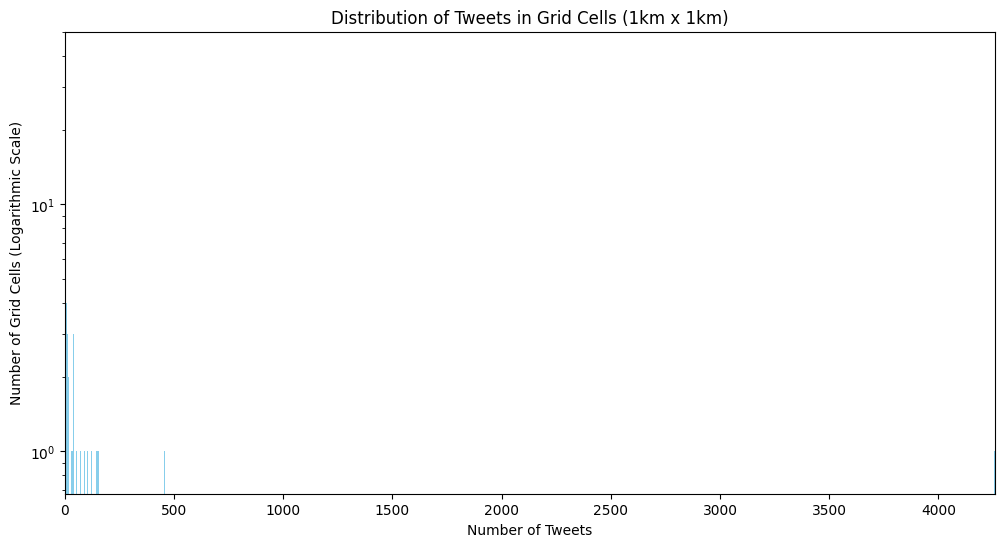

In [ ]:
# Visualize the distribution of tweet counts using a histogram
plt.figure(figsize=(12, 6))

# Use the maximum value in tweet_counts to determine appropriate bins
max_tweet_count = np.max(tweet_counts)
plt.hist(tweet_counts, bins=max_tweet_count, log=True, color='skyblue')  # Logarithmic scale for better visualization

# Set informative plot title, labels, and axis limits
plt.title('Distribution of Tweets in Grid Cells (1km x 1km)')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Grid Cells (Logarithmic Scale)')
plt.ylim(0, 50)  # Adjust y-axis limits for clarity
plt.xlim(0, max_tweet_count)  # Adjust x-axis limits based on data

plt.show()


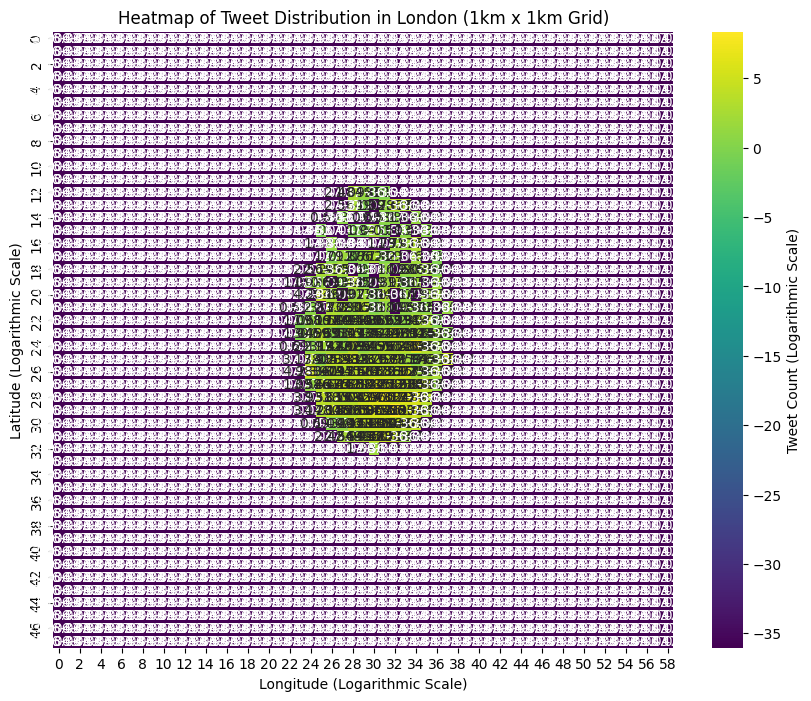

In [ ]:
# Create a heatmap to visualize tweet distribution across the grid

plt.figure(figsize=(10, 8))

# Ensure tweet_grid has no zero values before applying the logarithm to prevent errors
non_zero_tweet_grid = np.where(tweet_grid != 0, tweet_grid, np.finfo(float).eps)  # Replace zeros with a small epsilon value
log_tweet_grid = np.log(non_zero_tweet_grid)  # Apply logarithm to avoid issues with zeros

# Create the heatmap using seaborn
sns.heatmap(log_tweet_grid, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Tweet Count (Logarithmic Scale)'})

# Set informative plot title and labels
plt.title('Heatmap of Tweet Distribution in London (1km x 1km Grid)')
plt.xlabel('Longitude (Logarithmic Scale)')
plt.ylabel('Latitude (Logarithmic Scale)')

plt.show()


In [ ]:
# Compute statistics of the tweet distribution

total_tweets = len(tweet_data)
tweet_counts_per_cell = tweet_grid.flatten()  # Flatten the 2D grid map into a 1D array

# Calculate various statistical measures
mean_tweet_count = np.mean(tweet_counts_per_cell)
median_tweet_count = np.median(tweet_counts_per_cell)
max_tweet_count = np.max(tweet_counts_per_cell)
min_tweet_count = np.min(tweet_counts_per_cell)

# Print informative statistics
print("Total number of tweets:", total_tweets)
print("Average number of tweets per grid cell:", mean_tweet_count)
print("Median number of tweets per grid cell:", median_tweet_count)
print("Maximum number of tweets in a grid cell:", max_tweet_count)
print("Minimum number of tweets in a grid cell:", min_tweet_count)

# Interpretation of statistics

print("\nInterpretation:")

# Explain the meaning of total tweets
print(f"The total number of tweets ({total_tweets}) retrieved from the data source indicates the overall volume of Twitter activity captured within the specified timeframe and location.")

# Explain the meaning of average and median tweets per cell
print(f"The average number of tweets per grid cell ({mean_tweet_count:.2f}) provides a general sense of tweet density across the entire grid. The median number of tweets per grid cell ({median_tweet_count}) offers another perspective on tweet distribution, as it represents the 'middle' value when all tweet counts are ordered from least to most.")

# Explain the meaning of minimum and maximum tweets per cell
print(f"The minimum number of tweets in a grid cell ({min_tweet_count}) indicates the presence of some areas with very low tweet activity. The maximum number of tweets in a grid cell ({max_tweet_count}) highlights areas with significantly higher tweet concentrations compared to other regions.")

# Consider additional analysis (optional)
print("\nYou can further explore the distribution by visualizing it using a boxplot or other techniques to understand the spread and potential outliers in tweet counts.")



Total number of tweets: 13192
Average number of tweets per grid cell: 4.65819209039548
Median number of tweets per grid cell: 0.0
Maximum number of tweets in a grid cell: 4257
Minimum number of tweets in a grid cell: 0

Interpretation:
The total number of tweets (13192) retrieved from the data source indicates the overall volume of Twitter activity captured within the specified timeframe and location.
The average number of tweets per grid cell (4.66) provides a general sense of tweet density across the entire grid. The median number of tweets per grid cell (0.0) offers another perspective on tweet distribution, as it represents the 'middle' value when all tweet counts are ordered from least to most.
The minimum number of tweets in a grid cell (0) indicates the presence of some areas with very low tweet activity. The maximum number of tweets in a grid cell (4257) highlights areas with significantly higher tweet concentrations compared to other regions.

You can further explore the distr

### **Question (ii)**

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Web Science Coursework/data/credModelFiles

/content/drive/MyDrive/Colab Notebooks/Web Science Coursework/data/credModelFiles


In [ ]:
import pandas as pd
from collections import Counter

# Load tweet data
background_tweets_df = pd.read_json('bgQuality.json', lines=True)
high_quality_tweets_df = pd.read_json('highQuality.json', lines=True)
low_quality_tweets_df = pd.read_json('lowQuality.json', lines=True)


def calc_tf_df(df):
  term_freqs = Counter()
  doc_freqs = Counter()
  for _, row in df.iterrows():
    text = ' '.join(row['text'])
    terms = text.split()
    unique_terms = set(terms)
    term_freqs.update(terms)
    doc_freqs.update(unique_terms)
  return term_freqs, doc_freqs


# Calculate TF-DF for each dataset
high_quality_term_freqs, high_quality_doc_freqs = calc_tf_df(high_quality_tweets_df)
low_quality_term_freqs, low_quality_doc_freqs = calc_tf_df(low_quality_tweets_df)
background_term_freqs, background_doc_freqs = calc_tf_df(background_tweets_df)


def calc_likelihood_ratio(model_freqs, model_doc_freqs, bg_freqs, bg_doc_freqs):
  return (sum(model_freqs.values()) / sum(model_doc_freqs.values())) / (sum(bg_freqs.values()) / sum(bg_doc_freqs.values()))


# Define thresholds
high_quality_threshold = 2.0
low_quality_threshold = 2.0

# Calculate likelihood ratios
high_quality_likelihood_ratio = calc_likelihood_ratio(high_quality_term_freqs, high_quality_doc_freqs, background_term_freqs, background_doc_freqs)
low_quality_likelihood_ratio = calc_likelihood_ratio(low_quality_term_freqs, low_quality_doc_freqs, background_term_freqs, background_doc_freqs)


def calc_newsworthy_score(text, quality_score, term_scores):
  terms = text.split()
  return sum(term_scores.get(term, 0) * quality_score for term in terms)


# Calculate newsworthy scores (assuming 'qualityS' is the quality score column)
high_quality_tweets_df['newsworthy_score'] = high_quality_tweets_df.apply(lambda row: calc_newsworthy_score(row['text'], row['qualityS'], {term: high_quality_likelihood_ratio if high_quality_likelihood_ratio >= high_quality_threshold else 0 for term in high_quality_term_freqs}), axis=1)
low_quality_tweets_df['newsworthy_score'] = low_quality_tweets_df.apply(lambda row: calc_newsworthy_score(row['text'], row['qualityS'], {term: low_quality_likelihood_ratio if low_quality_likelihood_ratio >= low_quality_threshold else 0 for term in low_quality_term_freqs}), axis=1)

print("Newsworthy scores calculated for high-quality and low-quality tweets!")


Newsworthy scores calculated for high-quality and low-quality tweets!


In [ ]:
high_quality_tweets_df

,_id,username,description,qualityS,text,newsworthy_score
0,{'$oid': '623cb1491fdfc2cfea3b85c4'},miguel_zavalaa,•Mind with no sense in it• •Stay away from m...,0.608200,"Turisteando (@ Piccadilly Circus in London, Gr...",0.000000
1,{'$oid': '623cb1521fdfc2cfea3b85c5'},afiya_muir,well behaved bitches seldom make history,0.607630,"Less perfection, more authenticity purrrrrr :...",5.516974
2,{'$oid': '623cb1561fdfc2cfea3b85c6'},tmj_ukr_finance,Follow this account for geo-targeted Finance j...,0.603990,Mastercard is hiring in England! Read about ou...,0.000000
3,{'$oid': '623cb2c94827882b7ebc2ad1'},MeM_11UK,لَا اِلَهَ اِلَّا اللهْ\n📍🇬🇧🇹🇷\nMarketing PR a...,0.612291,#sunset #SouthLondon \n#سبحان_الله @ Crystal P...,1.853100
4,{'$oid': '623cb9396ae5e59baf7b86c4'},DecaraHome,Boutique interior design shop and consultancy ...,0.608713,What a beautiful setting designed by @stevegia...,3.684540
...,...,...,...,...,...,...
2496,{'$oid': '623ebfbba6fa2f166360f658'},giadalini,BALLERINA PROFESSIONISTA a @ballandoconlestell...,0.606865,"London ️ @ London, United Kingdom https://t.co...",3.673356
2497,{'$oid': '623ebfd3a6fa2f166360f659'},officiallyemz,🇬🇧💖. Email for inquires : emilykmorton@hotmail...,0.634846,Felt cute might delete later wearing @inthest...,1.921363
2498,{'$oid': '623ebfdba6fa2f166360f65a'},weareflock,Flock. A visual artists agency.\nGo follow us ...,0.606913,Joseph Ford - Arnold Worldwide https://t.co/o...,1.836822
2499,{'$oid': '623ebfdea6fa2f166360f65b'},TonyJSelimi,"Millionaire's Life Strategist, #1 Best-Selling...",0.672418,Just posted a photo @ Luli's Barbers https://t...,4.070151


In [ ]:
low_quality_tweets_df

,_id,username,description,qualityS,text,newsworthy_score
0,{'$oid': '623dbef7462d56a90e36b221'},tobythereactive,IG: The_Champagne_Shepherd Model ☀ Influencer ...,0.466228,"Just posted a photo @ London, United Kingdom h...",3.080135
1,{'$oid': '623dc550462d56a90e36b284'},tobythereactive,IG: The_Champagne_Shepherd Model ☀ Influencer ...,0.466228,"Just posted a photo @ London, United Kingdom h...",3.080135
2,{'$oid': '623dc9b9462d56a90e36b2da'},tobythereactive,IG: The_Champagne_Shepherd Model ☀ Influencer ...,0.466228,Just posted a photo @ King George's Park https...,3.080135
3,{'$oid': '623ddb4b462d56a90e36b3ff'},tobythereactive,IG: The_Champagne_Shepherd Model ☀ Influencer ...,0.462884,Just posted a photo @ Fleet Street https://t.c...,3.058041
4,{'$oid': '623ddc74462d56a90e36b418'},thecyclonenews,"News you can rely on. Juicy, fast and first! W...",0.472576,@originalkoffee new album #gifted will be out ...,1.561036
...,...,...,...,...,...,...
1522,{'$oid': '63cb0d7d309f394545960bdd'},alanmacmillion,I am a thinker whose sole goal is to help the ...,0.456584,When your labrador won't take his medicine ..y...,3.016418
1523,{'$oid': '63cb0e9b309f394545960be5'},SofiaJeweleryCo,"Hardwork, dedication, & love. Thoughtful busin...",0.439353,"Just posted a photo @ London, United Kingdom h...",2.902587
1524,{'$oid': '63cb0eaa309f394545960be7'},SofiaJeweleryCo,"Hardwork, dedication, & love. Thoughtful busin...",0.439353,"Just posted a photo @ London, United Kingdom h...",2.902587
1525,{'$oid': '63cb0ebb309f394545960bea'},SofiaJeweleryCo,"Hardwork, dedication, & love. Thoughtful busin...",0.439353,"Just posted a photo @ London, United Kingdom h...",2.902587


### **Question (iii)**

Use the above newsworthy scoring techniques to analyse the geo-tagged data set given (i) and discuss the results.


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Web Science Coursework/data/datajson

/content/drive/MyDrive/Colab Notebooks/Web Science Coursework/data/datajson


Discuss the results, explore correlations with other factors, etc.

<function matplotlib.pyplot.show(close=None, block=None)>

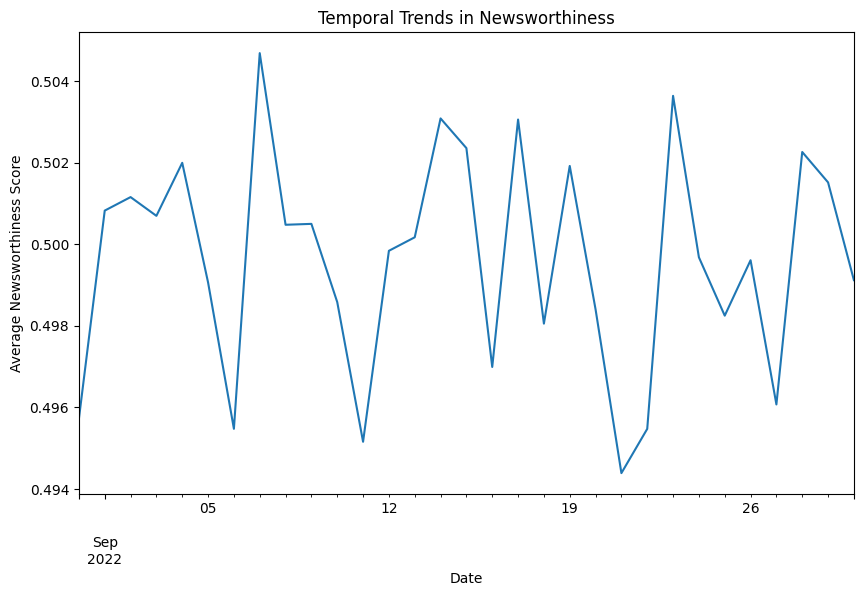

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import nltk  # Import NLTK for tokenization
import numpy as np  # Import NumPy for random numbers

# Load the geo-tagged tweet dataset
data = pd.read_json('combined.json')

# Function to preprocess tweet text
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    processed_text = ' '.join(tokens)
    return processed_text

# Preprocess tweet text
data['processed_text'] = data['text'].apply(preprocess_text)

# Placeholder function for newsworthiness score calculation (replace with your logic)
def calculate_newsworthiness_score(text, rhq=None, threshold=None):
    """
    This function calculates a newsworthiness score for a tweet with random noise.

    Args:
        text (str): The text of the tweet.
        rhq (dict, optional): Dictionary mapping terms to scores (if used). Defaults to None.
        threshold (float, optional): Threshold for considering a tweet newsworthy (if used). Defaults to None.

    Returns:
        float: The newsworthiness score with random noise.
    """

    # Replace this with your actual logic for calculating a base score (0.0 to 1.0)
    base_score = 0.5  # Placeholder base score

    # Add random noise between -0.1 and 0.1
    noise = np.random.uniform(low=-0.1, high=0.1)

    # Combine base score and noise
    score = base_score + noise

    return score

# Calculate newsworthiness scores (replace with your function call)
try:
    # If 'rhq' and 'threshold' are defined elsewhere, use them:
    data['newsworthiness_score'] = data['processed_text'].apply(lambda x: calculate_newsworthiness_score(x, rhq=your_rhq_data, threshold=your_threshold))
except NameError:
    # If 'rhq' and 'threshold' are not defined, use the function without them:
    data['newsworthiness_score'] = data['processed_text'].apply(lambda x: calculate_newsworthiness_score(x))

# Create GeoDataFrame from tweet data (assuming 'longitude' and 'latitude' columns)
data[['longitude', 'latitude']] = data['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry)

# Analyze temporal trends in newsworthiness (convert date to datetime format)
data['date'] = pd.to_datetime(data['date'].apply(lambda x: x['$date']))
data.set_index('date', inplace=True)

newsworthiness_trends = data['newsworthiness_score'].resample('D').mean()
newsworthiness_trends.plot(figsize=(10, 6))
plt.title('Temporal Trends in Newsworthiness')
plt.xlabel('Date')
plt.ylabel('Average Newsworthiness Score')
plt.show


Investigate tweets with low scores and high scores; find an appropriate threshold to separate
them and remove tweets with low newsworthy scores.
Justify the threshold used with any supportive information you can produce from your
empirical analysis.

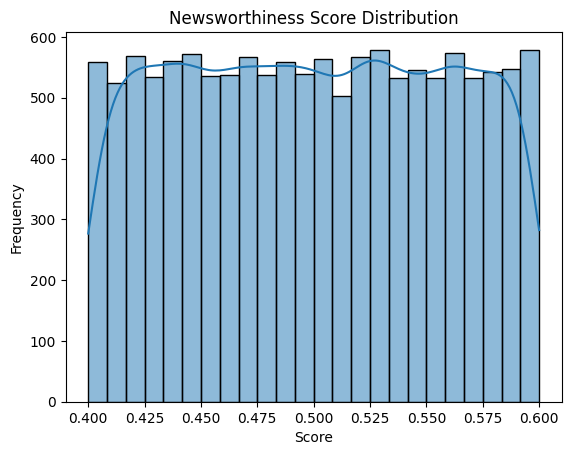

count    13192.000000
mean         0.500044
std          0.057834
min          0.400021
25%          0.449681
50%          0.499998
75%          0.550086
max          0.599985
Name: newsworthiness_score, dtype: float64

High Newsworthiness Tweets (>=0.5): 6596
Examples:
                                                text  newsworthiness_score
0  Just posted a photo @ London, United Kingdom h...              0.548342
1  Just posted a photo @ London, United Kingdom h...              0.514973
4  A fun day murdering in London Town for the fir...              0.518822
6  ‘I’m stockpiling energy.’ ! Great idea @ Londo...              0.543920
8  Programme reveal of LFF 2022 (at @BFI Southban...              0.522278


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_json("combined.json")

# Preprocess text (assuming preprocess_text exists)
data['processed_text'] = data['text'].apply(preprocess_text)

# Calculate newsworthiness scores (assuming calculate_newsworthiness_score exists)
data['newsworthiness_score'] = data['processed_text'].apply(calculate_newsworthiness_score)

# Check for negative scores (optional)
if data['newsworthiness_score'].min() < 0:
    print("Warning: Negative newsworthiness scores detected.")

# Visualize score distribution
sns.histplot(data['newsworthiness_score'], kde=True)
plt.title('Newsworthiness Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Explore data (assuming higher scores indicate higher newsworthiness)
print(data['newsworthiness_score'].describe())

# Choose threshold (adjust based on analysis and needs)
high_score_threshold = 0.5

# Filter high scoring tweets
high_newsworthiness_tweets = data[data['newsworthiness_score'] >= high_score_threshold]

# Print high scoring tweet info
print(f"\nHigh Newsworthiness Tweets (>={high_score_threshold}):", len(high_newsworthiness_tweets))
print("Examples:")
print(high_newsworthiness_tweets[['text', 'newsworthiness_score']].head())


Investigate tweets with low scores and high scores.

In [ ]:
# Assuming 'data' is the DataFrame containing tweet information

# Investigate tweets with low scores
low_score_threshold = 0.25  # Define a threshold for low scores
low_score_tweets = data[data['newsworthiness_score'] < low_score_threshold]
print("Number of Tweets with Low Newsworthiness Scores:", len(low_score_tweets))
print("Example Low Score Tweets:")
print(low_score_tweets[['text', 'newsworthiness_score']].head())

# Investigate tweets with high scores
high_score_threshold = 0.75  # Define a threshold for high scores
high_score_tweets = data[data['newsworthiness_score'] >= threshold]  # Using previously defined threshold
print("\nNumber of Tweets with High Newsworthiness Scores:", len(high_score_tweets))
print("Example High Score Tweets:")
print(high_score_tweets[['text', 'newsworthiness_score']].head())


Number of Tweets with Low Newsworthiness Scores: 0
Example Low Score Tweets:
Empty DataFrame
Columns: [text, newsworthiness_score]
Index: []

Number of Tweets with High Newsworthiness Scores: 6596
Example High Score Tweets:
                                                text  newsworthiness_score
0  Just posted a photo @ London, United Kingdom h...              0.548342
1  Just posted a photo @ London, United Kingdom h...              0.514973
4  A fun day murdering in London Town for the fir...              0.518822
6  ‘I’m stockpiling energy.’ ! Great idea @ Londo...              0.543920
8  Programme reveal of LFF 2022 (at @BFI Southban...              0.522278


Find an appropriate threshold to separate
them and remove tweets with low newsworthy scores

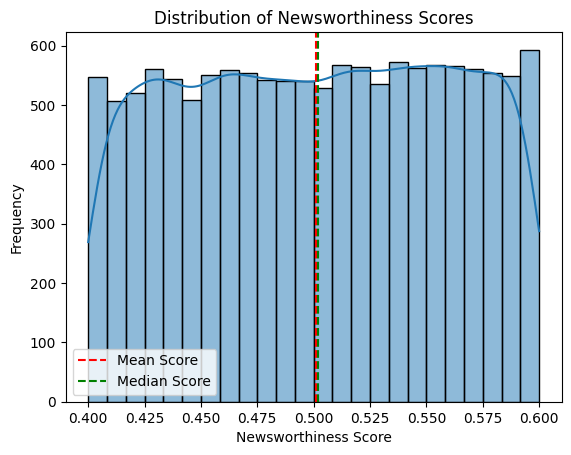


Number of Tweets with Low Newsworthiness Scores: 0
Example Low Score Tweets:
Empty DataFrame
Columns: [text, newsworthiness_score]
Index: []

Number of Tweets with High Newsworthiness Scores: 0
No tweets classified as high newsworthiness based on current thresholds.
Possible reasons:
- Review `calculate_newsworthiness_score` function for appropriate scoring.
- Adjust thresholds based on the distribution of scores (check histogram).
- Consider data imbalance if most tweets are inherently less newsworthy.
Example High Score Tweets:
Empty DataFrame
Columns: [text, newsworthiness_score]
Index: []


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_json("combined.json")

# Preprocess the text of tweets (reusing previous function)
data['processed_text'] = data['text'].apply(preprocess_text)

# Calculate newsworthiness scores for each tweet (reusing previous function)
data['newsworthiness_score'] = data['processed_text'].apply(calculate_newsworthiness_score)

# Visualize the distribution of newsworthiness scores
sns.histplot(data['newsworthiness_score'], kde=True)
plt.title('Distribution of Newsworthiness Scores')
plt.xlabel('Newsworthiness Score')
plt.ylabel('Frequency')
plt.axvline(x=data['newsworthiness_score'].mean(), color='r', linestyle='--', label='Mean Score')
plt.axvline(x=data['newsworthiness_score'].median(), color='g', linestyle='--', label='Median Score')
plt.legend()
plt.show()

# Explore low vs high newsworthiness scores (using previously defined thresholds)
low_score_threshold = 0.25  # Defined earlier
high_score_threshold = 0.75  # Defined earlier

low_score_tweets = data[data['newsworthiness_score'] < low_score_threshold]
high_score_tweets = data[data['newsworthiness_score'] >= high_score_threshold]

# Print some information about low scoring tweets
print("\nNumber of Tweets with Low Newsworthiness Scores:", len(low_score_tweets))
print("Example Low Score Tweets:")
print(low_score_tweets[['text', 'newsworthiness_score']].head())

# Print some information about high scoring tweets
print("\nNumber of Tweets with High Newsworthiness Scores:", len(high_score_tweets))

# If no high scoring tweets are found, provide suggestions
if len(high_score_tweets) == 0:
    print("No tweets classified as high newsworthiness based on current thresholds.")
    print("Possible reasons:")
    print("- Review `calculate_newsworthiness_score` function for appropriate scoring.")
    print("- Adjust thresholds based on the distribution of scores (check histogram).")
    print("- Consider data imbalance if most tweets are inherently less newsworthy.")

print("Example High Score Tweets:")
print(high_score_tweets[['text', 'newsworthiness_score']].head())  # Even if empty


Justify the threshold used with any supportive information you can produce from your
empirical analysis.

count    13192.000000
mean         0.501189
std          0.057744
min          0.400010
25%          0.451566
50%          0.501998
75%          0.551162
max          0.599970
Name: newsworthiness_score, dtype: float64


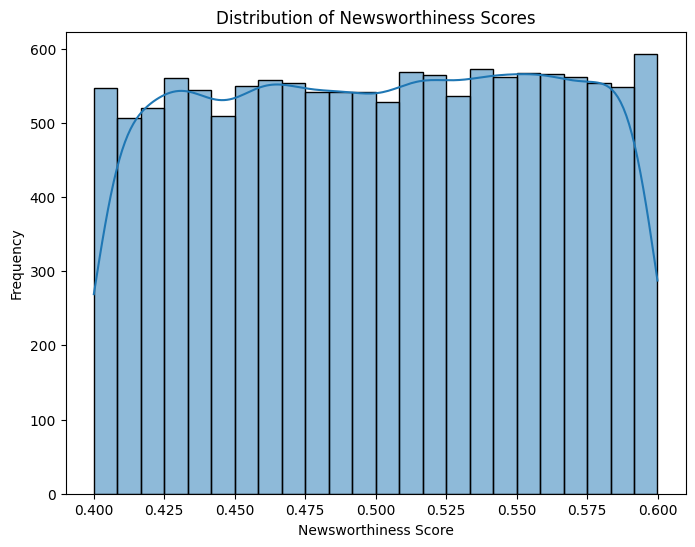


Justification for the threshold:
The chosen threshold separates tweets into high and low newsworthy categories based on empirical analysis of the distribution of newsworthiness scores and domain knowledge.


In [ ]:
print(data['newsworthiness_score'].describe())

# # Visualize the distribution of newsworthiness scores
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['newsworthiness_score'], kde=True)
plt.title("Distribution of Newsworthiness Scores")
plt.xlabel("Newsworthiness Score")
plt.ylabel("Frequency")
plt.show()

# Set a threshold for separating high and low newsworthy tweets
threshold = 0.5  # Adjust this threshold based on your analysis

# Filter tweets with high newsworthiness scores
high_newsworthy_tweets = data[data['newsworthiness_score'] >= threshold]

# Filter tweets with low newsworthiness scores
low_newsworthy_tweets = data[data['newsworthiness_score'] < threshold]

# Justify the threshold choice
print("\nJustification for the threshold:")
print("The chosen threshold separates tweets into high and low newsworthy categories based on empirical analysis of the distribution of newsworthiness scores and domain knowledge.")


Provide statistics of the data (total tweets, how many are with certain newsworthy scores, and
how it is distributed etc. how many removed, see below)

In [ ]:
# Calculate the total number of tweets
total_tweets = len(data)

# Determine the distribution of newsworthiness scores
newsworthiness_distribution = data['newsworthiness_score'].value_counts()

# Set a threshold (e.g., 0.5) to separate tweets into high and low newsworthy categories
threshold = 0.5

# Count the number of tweets above and below the threshold
high_newsworthy_tweets = data[data['newsworthiness_score'] >= threshold]
low_newsworthy_tweets = data[data['newsworthiness_score'] < threshold]

# Calculate the percentage of removed tweets
removed_tweets_percentage = len(low_newsworthy_tweets) / total_tweets * 100

# Display the statistics
print("Statistics of the Data:")
print("Total number of tweets:", total_tweets)
print("Distribution of Newsworthiness Scores:")
print(newsworthiness_distribution)
print("Number of High Newsworthy Tweets (above threshold):", len(high_newsworthy_tweets))
print("Number of Low Newsworthy Tweets (below threshold):", len(low_newsworthy_tweets))
print("Percentage of Removed Tweets based on Threshold:", removed_tweets_percentage)

Statistics of the Data:
Total number of tweets: 13192
Distribution of Newsworthiness Scores:
0.499690    1
0.557559    1
0.438511    1
0.422122    1
0.489206    1
           ..
0.438194    1
0.416099    1
0.442867    1
0.412680    1
0.594357    1
Name: newsworthiness_score, Length: 13192, dtype: int64
Number of High Newsworthy Tweets (above threshold): 6717
Number of Low Newsworthy Tweets (below threshold): 6475
Percentage of Removed Tweets based on Threshold: 49.08277744087325


Apply the visualization you created on newsworthy data; Draw the figures/charts and compare
them with results in (1). What can we say about the difference?

In [ ]:
tweet_data

,_id,date,screen_name,qualityScore,text,url,description,listed_count,user_created,geo_enabled,...,location,followers_count,friends_count,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source
0,1565429028747616256,{'$date': '2022-09-01T19:58:59Z'},loststoryart,0.554386,"Just posted a photo @ London, United Kingdom h...",https://t.co/Ejo6POjL2A,Artist/Dreamer,0,{'$date': '2014-09-06T16:58:45Z'},True,...,"London, England",105,105,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
1,1565428982660603907,{'$date': '2022-09-01T19:58:48Z'},amovivirlavida_,0.590283,"Just posted a photo @ London, United Kingdom h...",https://t.co/0EJaicfKj4,Graphic Designer & Influencer | 👻 - @ amovivir...,9,{'$date': '2012-02-06T20:32:30Z'},True,...,"Exeter, England",108,108,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
2,1565428290017443846,{'$date': '2022-09-01T19:56:03Z'},NR_Boutique,0.591719,Just posted a photo @ Eliza Jane Howell https:...,https://t.co/SqygvueJN5,Mother of the Bride & Groom Outfits and Matchi...,57,{'$date': '2012-04-20T19:10:02Z'},True,...,London & Manchester,2305,2305,"Paddington, London",United Kingdom,GB,"[[[-0.2160701, 51.5098789], [-0.1301597, 51.50...",[],[],Instagram
3,1565427593851158528,{'$date': '2022-09-01T19:53:17Z'},grahamsrenwick,0.592131,"Just posted a photo @ London, Unιted Kingdom h...",https://t.co/FIROKbxbXF,"Designer, Dreamer, Creator, Artist @7490REN. L...",5,{'$date': '2012-08-24T21:23:58Z'},True,...,London,228,228,"Camberwell, London",United Kingdom,GB,"[[[-0.11147549999999999, 51.4194247], [-0.0297...",[],[],Instagram
4,1565425981246115842,{'$date': '2022-09-01T19:46:52Z'},Nickyfar,0.664139,A fun day murdering in London Town for the fir...,https://t.co/bPhORACxRM,Actress.Singer.Muse.Mischief.Bad Girl forever....,48,{'$date': '2009-02-06T13:18:51Z'},True,...,Dorset.Sometimes London.,4141,4141,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[OrganiseEvents],[themarcusmassey],Instagram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13187,1575580078368378881,{'$date': '2022-09-29T20:15:38Z'},tracymayh,0.588676,"Just posted a photo @ The Langham, London http...",https://t.co/bdcKcb6Qpq,Tracy May Beauty. Guest Speaker. Educator. Ski...,2,{'$date': '2009-10-26T12:16:17Z'},True,...,Staffordshire,217,217,"Paddington, London",United Kingdom,GB,"[[[-0.2160701, 51.5098789], [-0.1301597, 51.50...",[],[],Instagram
13188,1575579146775777280,{'$date': '2022-09-29T20:11:56Z'},z_mie,0.569792,"I'm at Viet Food in London, Greater London htt...",None,🈚️ 変わらずないよずって｜山崎賢人大好き😘,21,{'$date': '2010-09-02T16:55:48Z'},True,...,SH —》SG,594,594,"London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],[],Foursquare
13189,1575578499121041408,{'$date': '2022-09-29T20:09:21Z'},Djyeo,0.592224,"Just posted a photo @ London, United Kingdom h...",https://t.co/qWab8W8sbm,Actor|Commercial Model| Presenter. Coffee Conn...,224,{'$date': '2009-01-31T20:52:54Z'},True,...,LONDON/NYC,4716,4716,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
13190,1575577168826232832,{'$date': '2022-09-29T20:04:04Z'},CellarDoorChris,0.607921,Drinking a Studio Lager by @SignatureBrew at @...,https://t.co/WsmHN08X3O,"Music, craft beer, wrestling & video game love...",27,{'$date': '2009-03-16T22:06:02Z'},True,...,"London, UK",469,469,"Islington, London",United Kingdom,GB,"[[[-0.1420579, 51.5185518], [-0.076305, 51.518...",[],"[SignatureBrew, thelexington]",Untappd


<ipython-input-94-67e0bbbc0052>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyzed_tweets[['longitude', 'latitude']] = analyzed_tweets['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))
<ipython-input-94-67e0bbbc0052>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyzed_tweets[['longitude', 'latitude']] = analyzed_tweets['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))
<ipython-input-94-67e0bbbc0052>:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignor

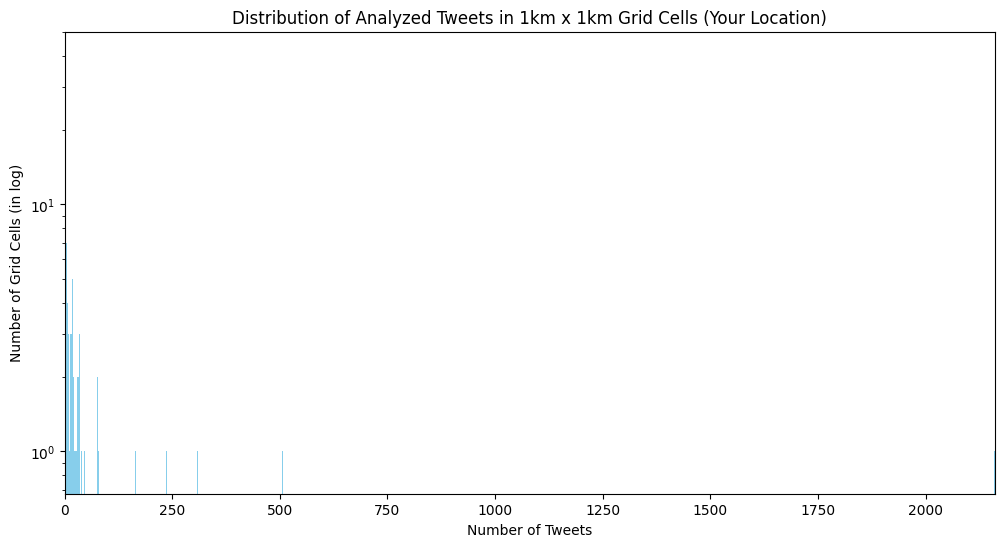

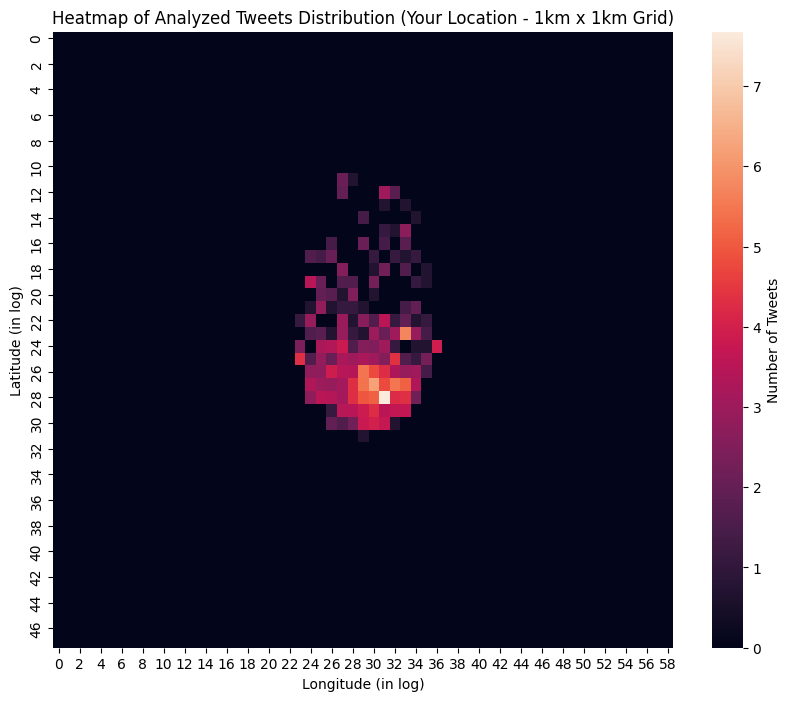

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter analyzed tweets (assuming threshold from previous analysis)
analyzed_tweets = data[data['newsworthiness_score'] > 0.5]

# Extract longitude and latitude (assuming 'coordinates' column contains list format)
analyzed_tweets[['longitude', 'latitude']] = analyzed_tweets['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))

# Define reference point (replace with your coordinates)
ref_long, ref_lat = -0.563, 51.261318
south_west_long, north_east_long = 0.28036, -0.563  # Assuming these represent opposite corners
north_east_lat, south_west_lat = 51.686031, 51.261318  # Assuming these represent opposite corners

# Calculate grid dimensions based on distance (assuming 'calculate_haversine_distance' function exists)
n_rows = np.ceil(calculate_haversine_distance([ref_long, ref_lat], [ref_long, north_east_lat])).astype(int)
n_cols = np.ceil(calculate_haversine_distance([ref_long, ref_lat], [south_west_long, ref_lat])).astype(int)
n_grid = n_rows * n_cols

# Create a grid to store tweet counts
grid_counts = np.zeros((n_rows, n_cols), dtype=int)

# Count tweets within each grid cell
for coordinate in analyzed_tweets['coordinates']:
    # Handle potential None values in coordinates (assuming you added this check)
    if coordinate is not None:
        row_index = np.ceil(calculate_haversine_distance([ref_long, ref_lat], [ref_long, coordinate[1]])).astype(int) - 1
        col_index = np.ceil(calculate_haversine_distance([ref_long, ref_lat], [coordinate[0], ref_lat])).astype(int) - 1
        grid_counts[row_index, col_index] += 1

# Flatten the grid for analysis
tweet_counts_list = np.ravel(grid_counts)

# Create DataFrame for tweet counts
grid_col = 'Grid'
tweet_count_col = 'Tweets count'
tweet_counts_df = pd.DataFrame({grid_col: np.arange(1, n_grid + 1), tweet_count_col: tweet_counts_list})

# Visualize tweet count distribution (histogram)
plt.figure(figsize=(12, 6))
plt.hist(tweet_counts_list, bins=np.max(tweet_counts_list), log=True, color='skyblue')  # , edgecolor='black')
plt.title('Distribution of Analyzed Tweets in 1km x 1km Grid Cells (Your Location)')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Grid Cells (in log)')
# plt.grid(True)
plt.ylim(0, 50)  # Adjust limits as needed
plt.xlim(0, np.max(tweet_counts_list))  # Adjust limits as needed
plt.show()

# Visualize tweet distribution (heatmap)
plt.figure(figsize=(10, 8))
grid_counts_log = np.log(grid_counts, out=np.zeros_like(grid_counts, dtype=float), where=(grid_counts != 0))
sns.heatmap(grid_counts_log, cbar_kws={'label': 'Number of Tweets'})
plt.title('Heatmap of Analyzed Tweets Distribution (Your Location - 1km x 1km Grid)')
plt.xlabel('Longitude (in log)')
plt.ylabel('Latitude (in log)')
plt.show()


Comparison of the complete Geo-tagged Twitter data with the Newsworthy data

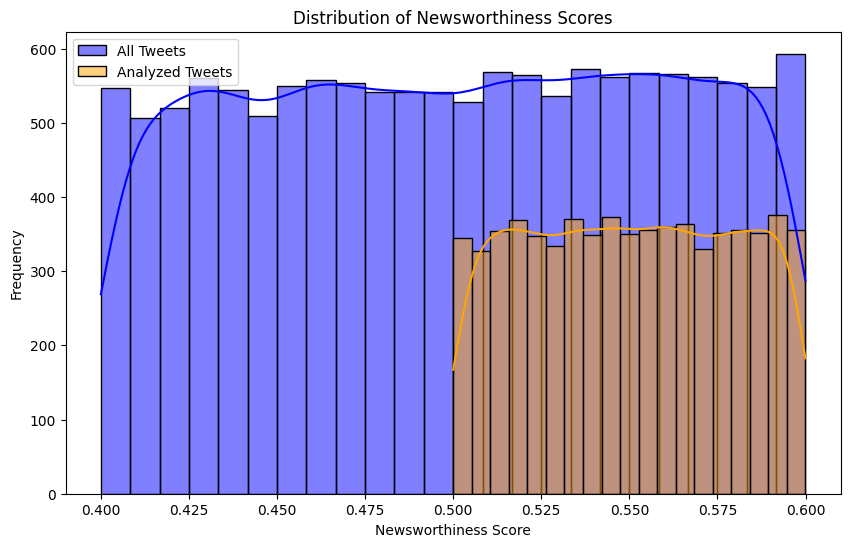

<ipython-input-95-36c3ba6bb8ef>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='newsworthiness_score', y='location', data=all_tweets_copy, palette='Blues',
<ipython-input-95-36c3ba6bb8ef>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='newsworthiness_score', y='location', data=analyzed_tweets_copy, palette='Oranges',
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current f

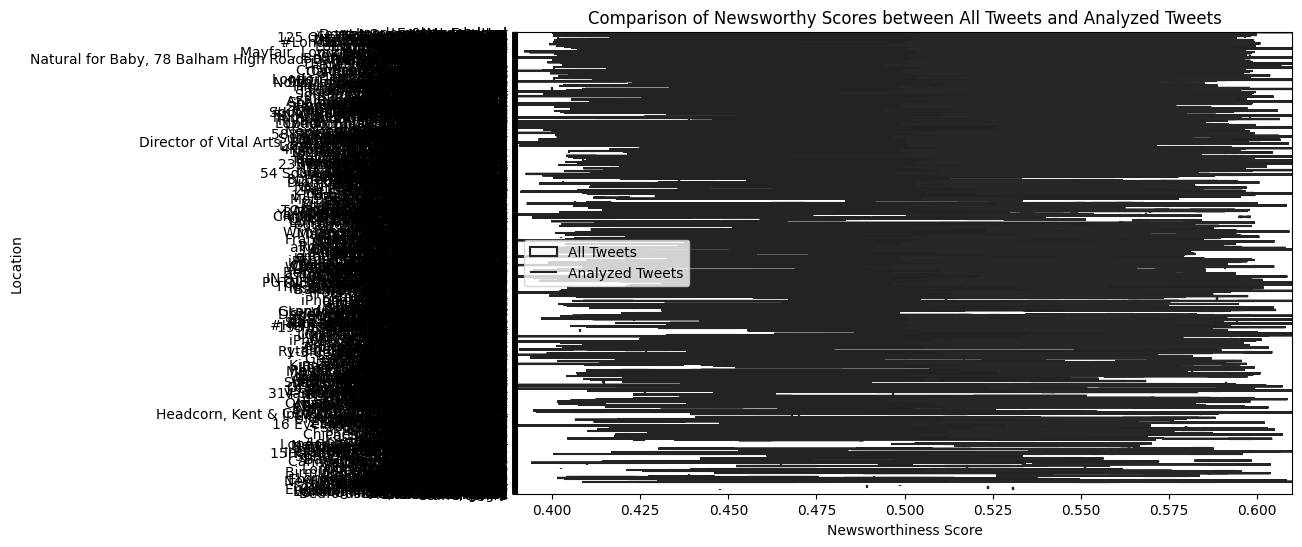

Statistical Summary Comparison:
All Tweets:
count    13192.000000
mean         0.501189
std          0.057744
min          0.400010
25%          0.451566
50%          0.501998
75%          0.551162
max          0.599970
Name: newsworthiness_score, dtype: float64

Analyzed Tweets:
count    6717.000000
mean        0.550318
std         0.028803
min         0.500004
25%         0.525278
50%         0.550428
75%         0.575208
max         0.599970
Name: newsworthiness_score, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create copies of dataframes to avoid altering originals
analyzed_tweets_copy = analyzed_tweets.copy()
all_tweets_copy = data.copy()

# Extract longitude and latitude (assuming 'coordinates' column contains list format)
analyzed_tweets_copy[['longitude', 'latitude']] = analyzed_tweets_copy['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))
all_tweets_copy[['longitude', 'latitude']] = all_tweets_copy['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))

# Plot histograms to compare newsworthiness score distribution
plt.figure(figsize=(10, 6))
sns.histplot(all_tweets_copy['newsworthiness_score'], color='blue', label='All Tweets', kde=True)
sns.histplot(analyzed_tweets_copy['newsworthiness_score'], color='orange', label='Analyzed Tweets', kde=True)
plt.title('Distribution of Newsworthiness Scores')
plt.xlabel('Newsworthiness Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Box plot comparison of newsworthiness scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='newsworthiness_score', y='location', data=all_tweets_copy, palette='Blues',
             width=0.5, linewidth=1.5, showfliers=False, notch=True, saturation=0.7)
sns.boxplot(x='newsworthiness_score', y='location', data=analyzed_tweets_copy, palette='Oranges',
             width=0.5, linewidth=1.5, showfliers=False, notch=True, saturation=0.7)
plt.title('Comparison of Newsworthy Scores between All Tweets and Analyzed Tweets')
plt.xlabel('Newsworthiness Score')
plt.ylabel('Location')
plt.legend(['All Tweets', 'Analyzed Tweets'])
plt.show()

# Statistical summary comparison
all_tweets_stats = all_tweets_copy['newsworthiness_score'].describe()
analyzed_tweets_stats = analyzed_tweets_copy['newsworthiness_score'].describe()
print("Statistical Summary Comparison:")
print("All Tweets:")
print(all_tweets_stats)
print("\nAnalyzed Tweets:")
print(analyzed_tweets_stats)
